# Logistic Regression of Poverty Rate By State

In [19]:
import pandas as pd
import numpy as np

# Load data from Excel
file_path = './clean/poverty-by-state (0 to 0.01).xlsx'  # Replace with your file path
data = pd.read_excel(file_path)

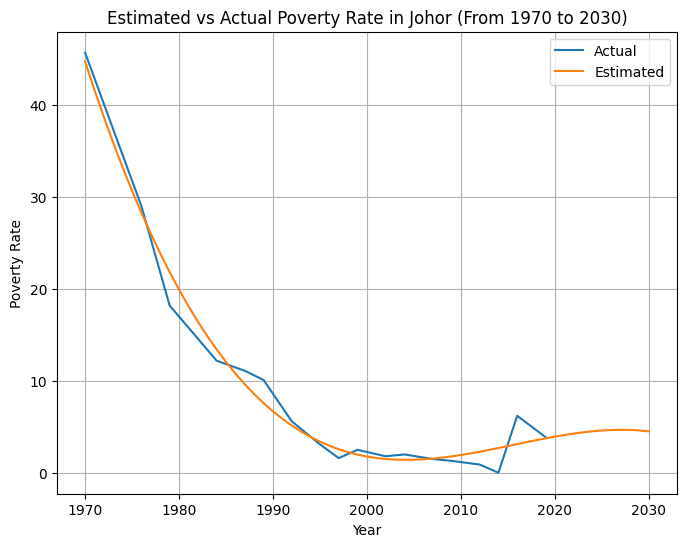

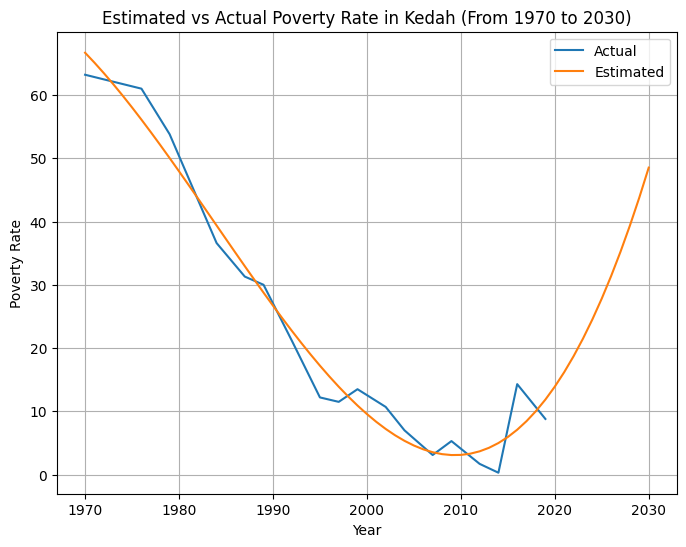

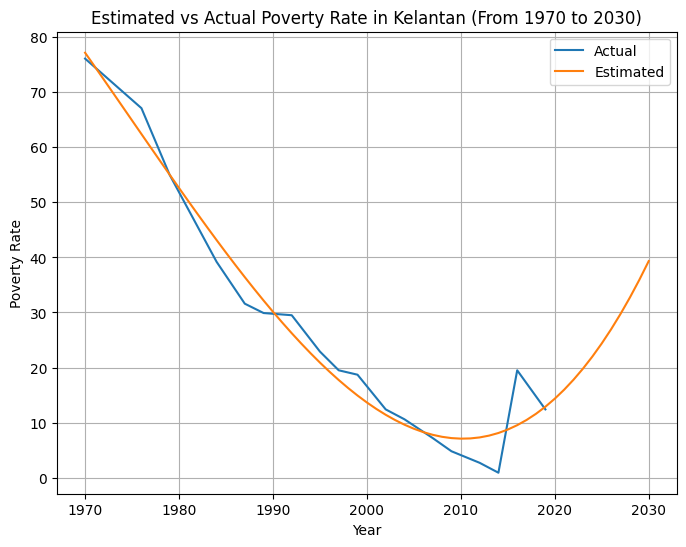

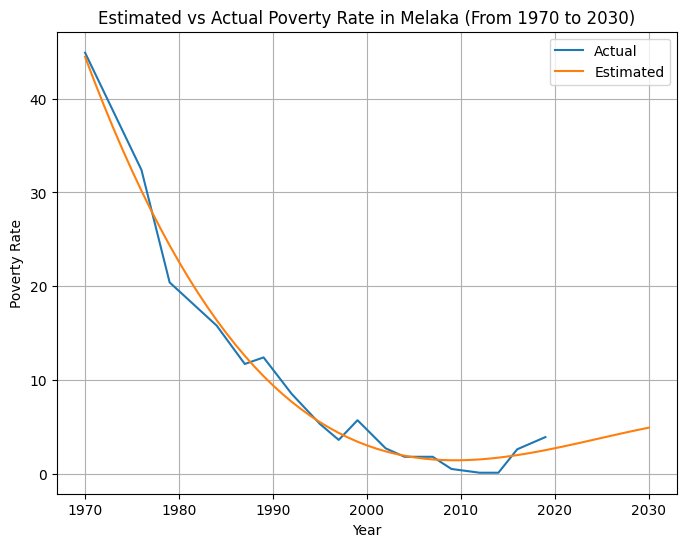

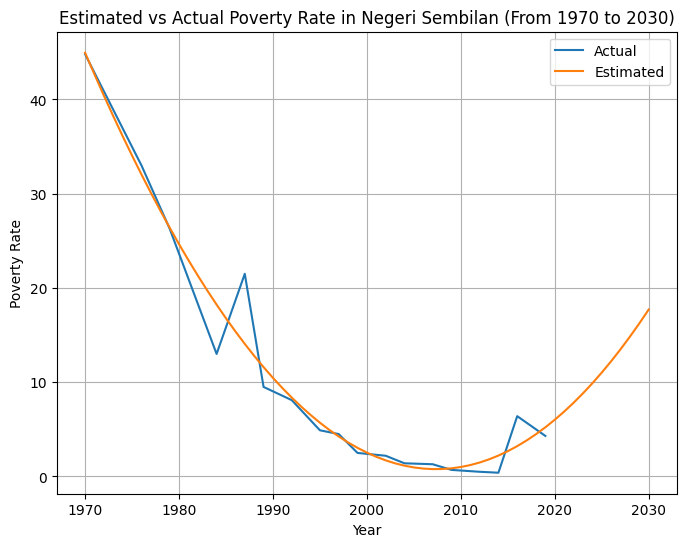

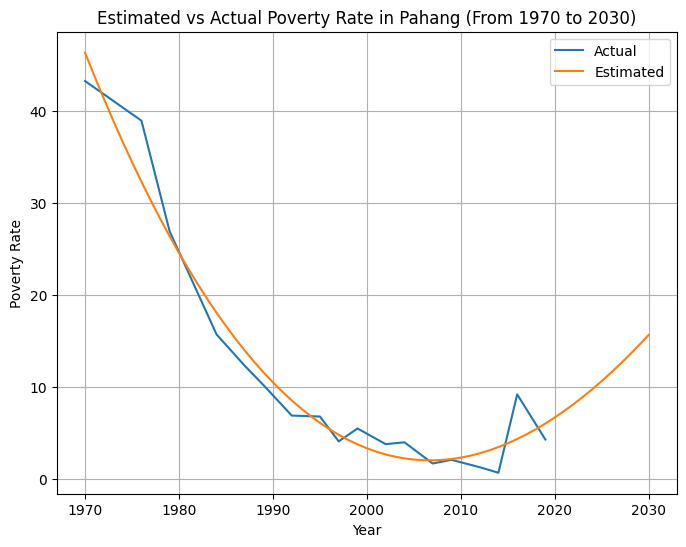

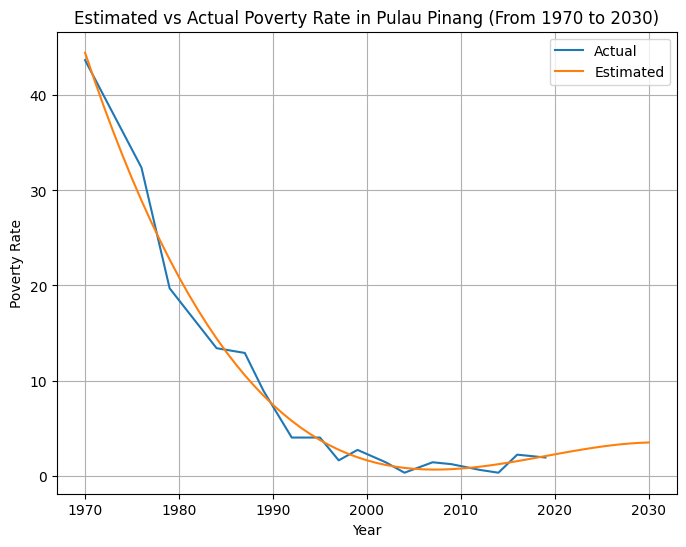

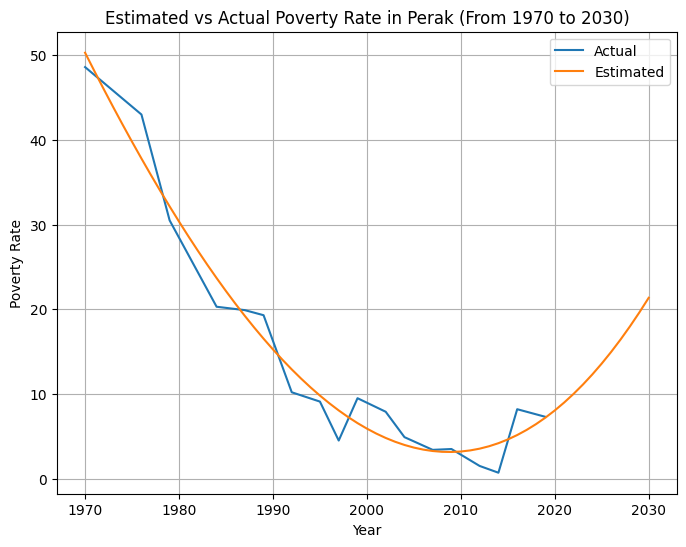

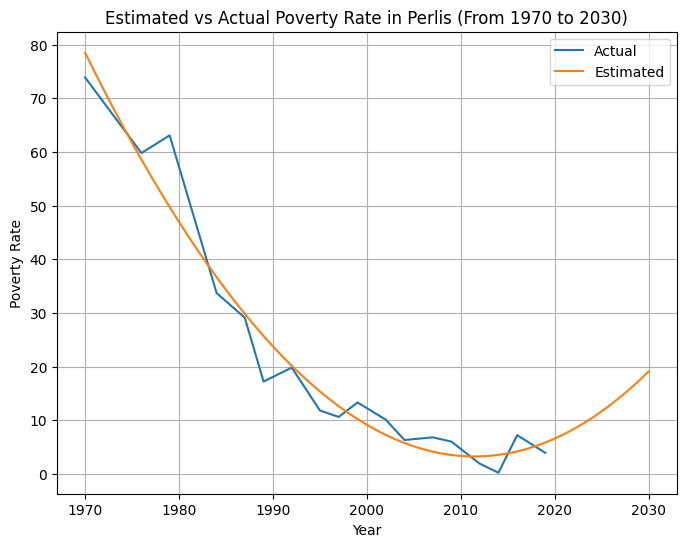

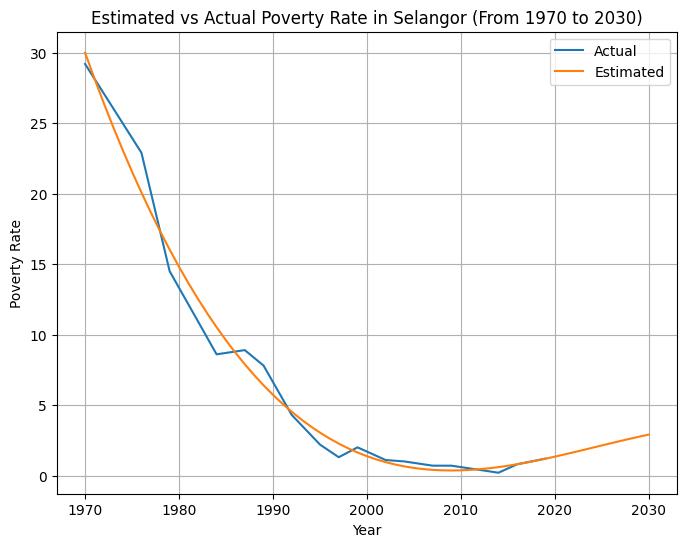

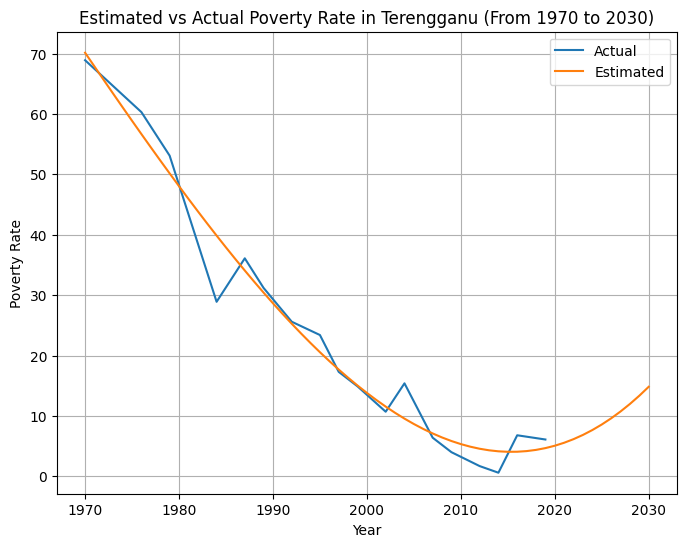

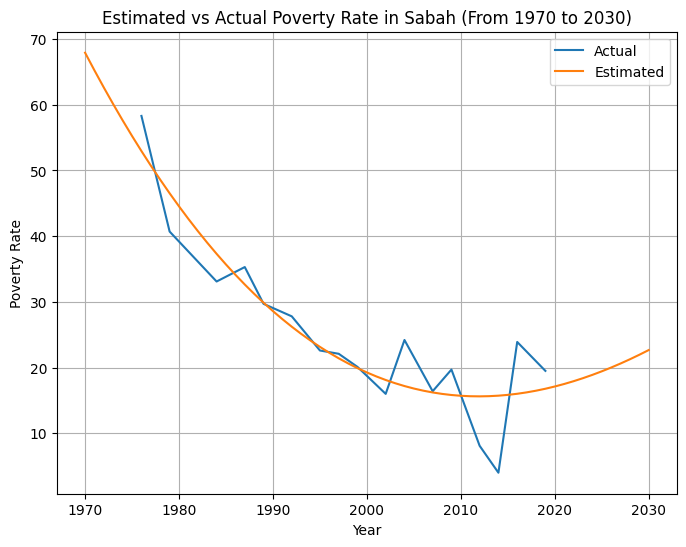

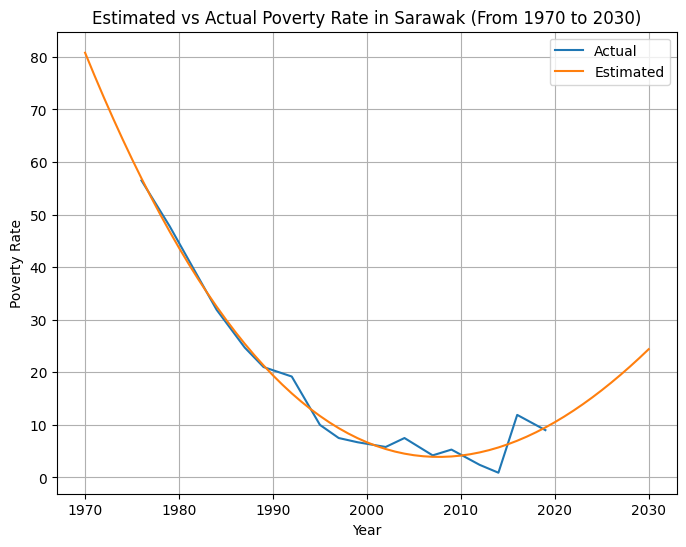

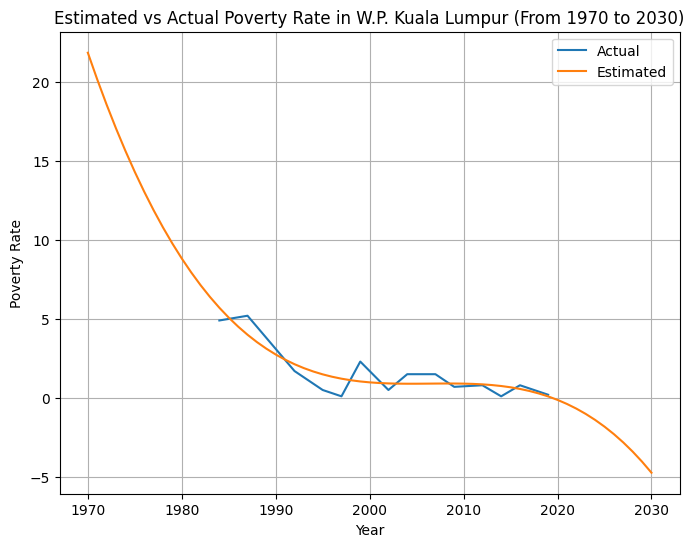

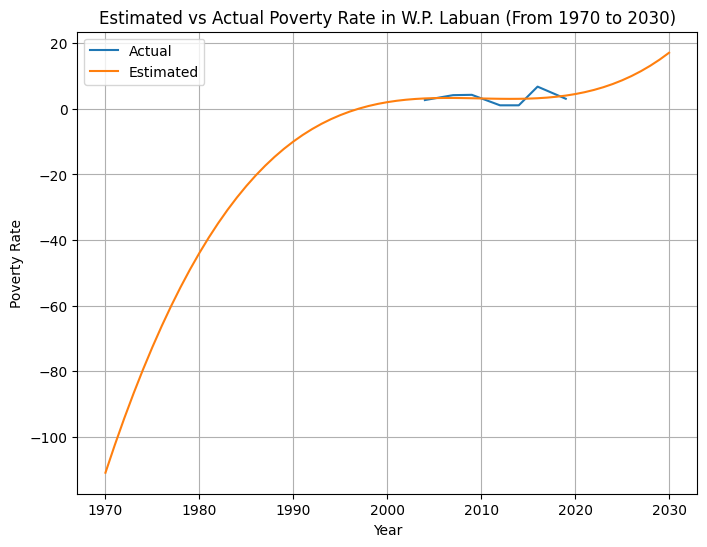

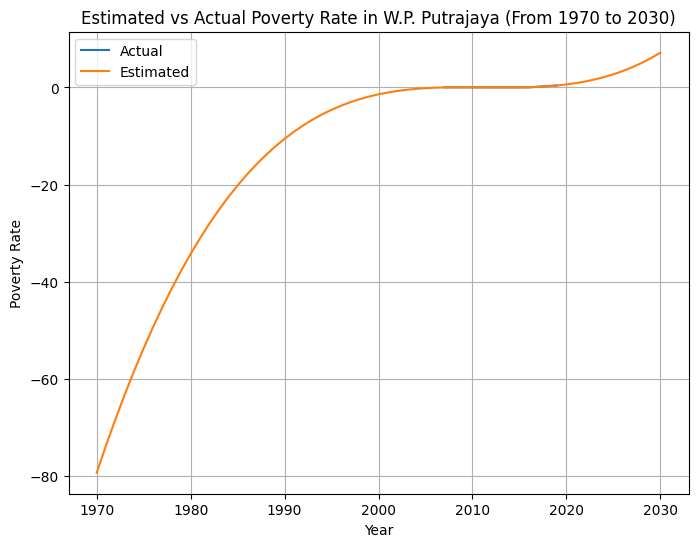

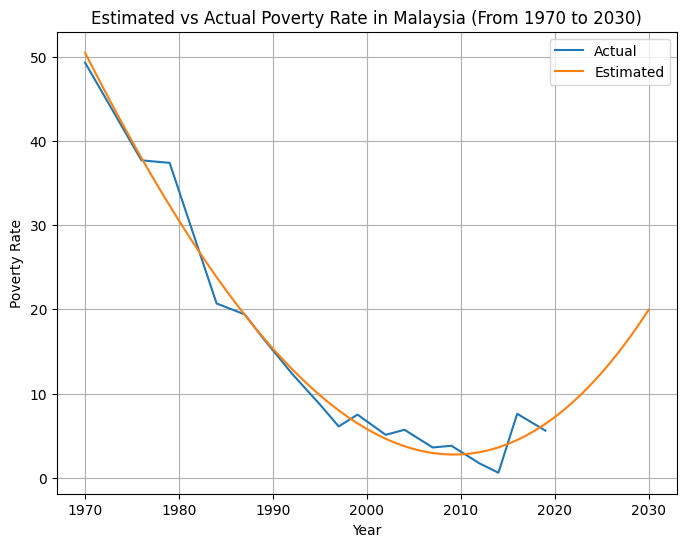

In [25]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Iterate over each state column
for column in data.columns[1:]:  # Exclude the 'Year' column
    state = column
    
    # Find the first non-null index for each column
    first_non_null_index = data[state].first_valid_index()
    
    if first_non_null_index is not None:
        # Prepare data for polynomial regression, starting from the first non-null index
        X = data.loc[first_non_null_index:, 'Year'].values.reshape(-1, 1)
        y = data.loc[first_non_null_index:, state]
        
        # Transform features into polynomial features
        poly = PolynomialFeatures(degree=3)
        X_poly = poly.fit_transform(X)
        
        # Initialize and fit polynomial regression model
        model = LinearRegression()
        model.fit(X_poly, y)
        
        # Predict poverty rates for years till 2030
        years_future = list(range(int(data['Year'].min()), 2031))
        X_future = np.array(years_future).reshape(-1, 1)
        X_future_poly = poly.transform(X_future)
        predicted_rates = model.predict(X_future_poly)
        
        # Plot the graph
        plt.figure(figsize=(8, 6))
        plt.plot(data['Year'], data[state], label='Actual')
        plt.plot(years_future, predicted_rates, label='Estimated')
        plt.title(f'Estimated vs Actual Poverty Rate in {state} (From {int(data["Year"].min())} to 2030)')
        plt.xlabel('Year')
        plt.ylabel('Poverty Rate')
        plt.legend()
        plt.grid(True)
        plt.show()





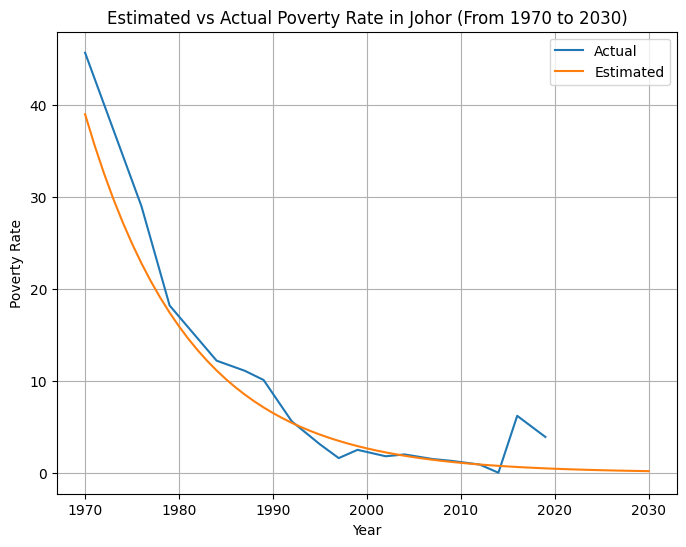

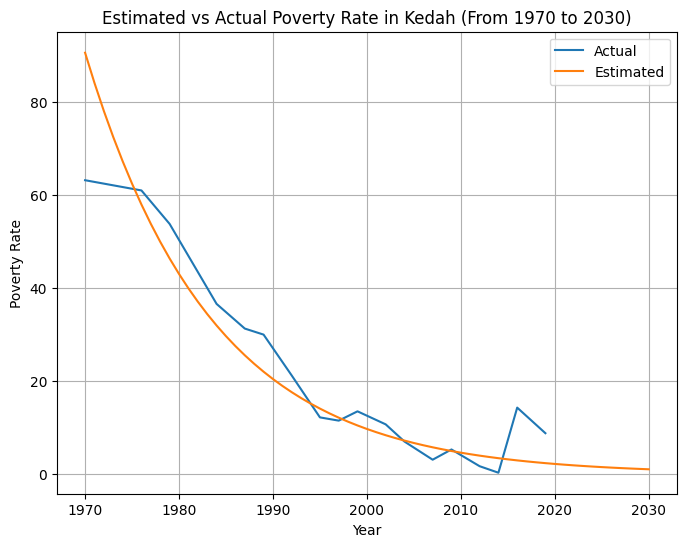

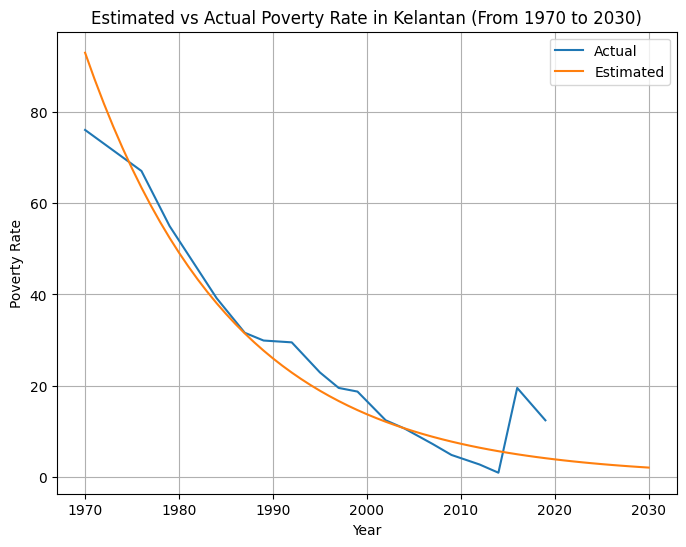

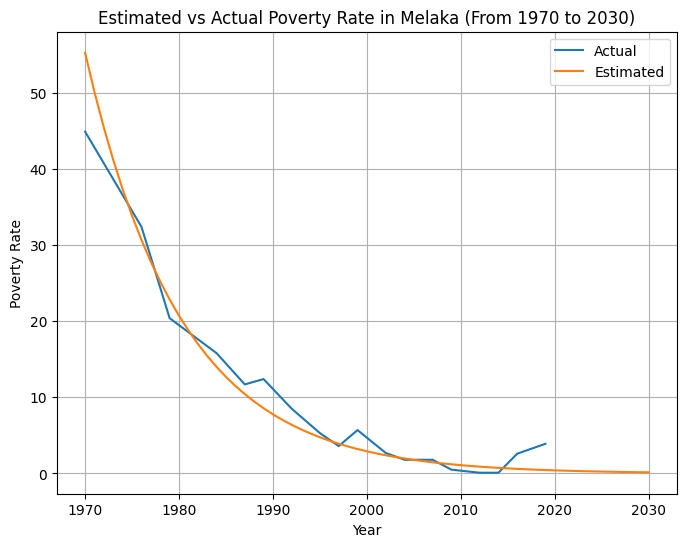

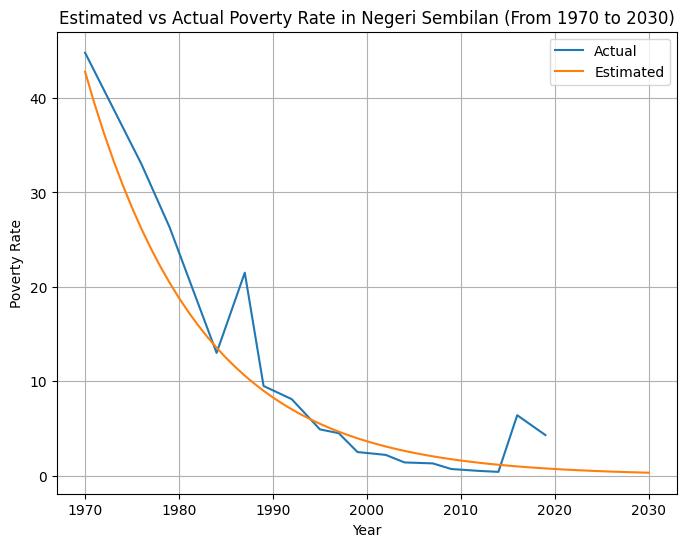

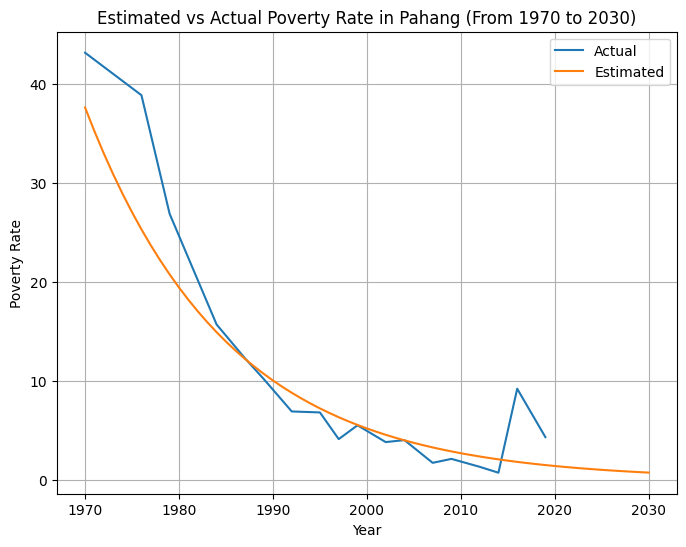

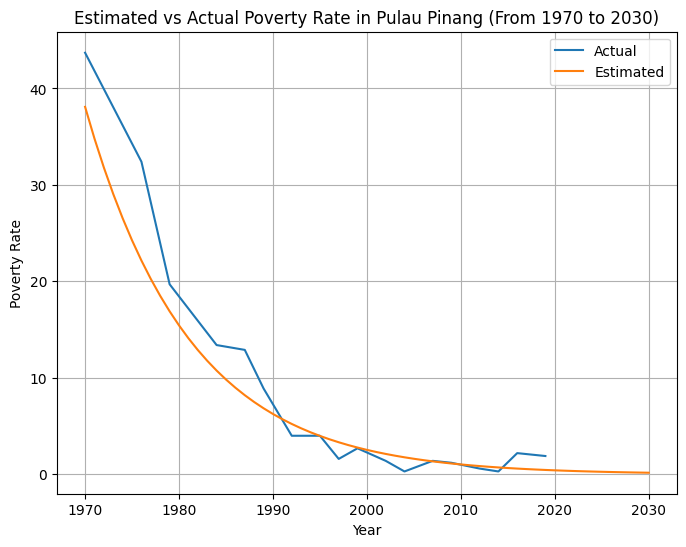

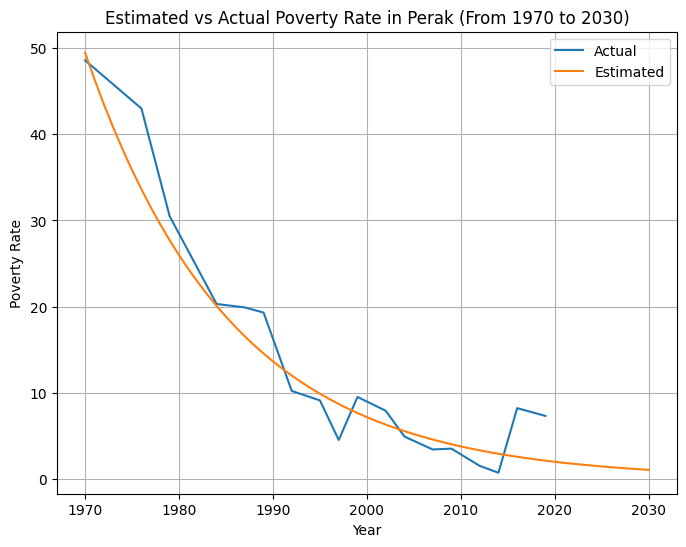

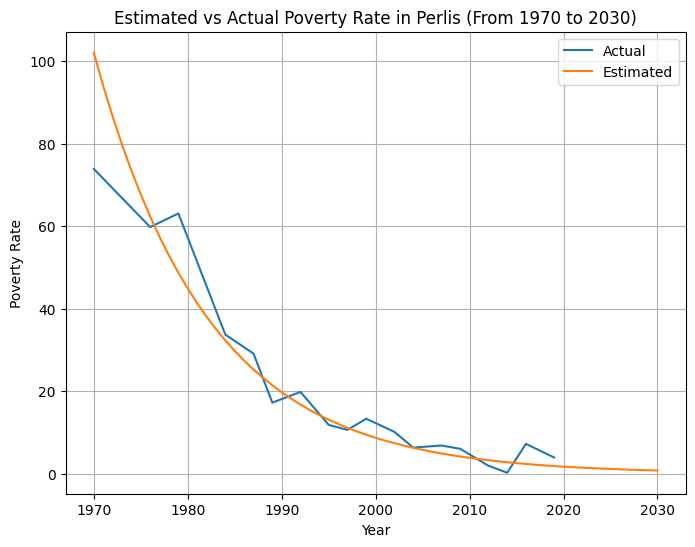

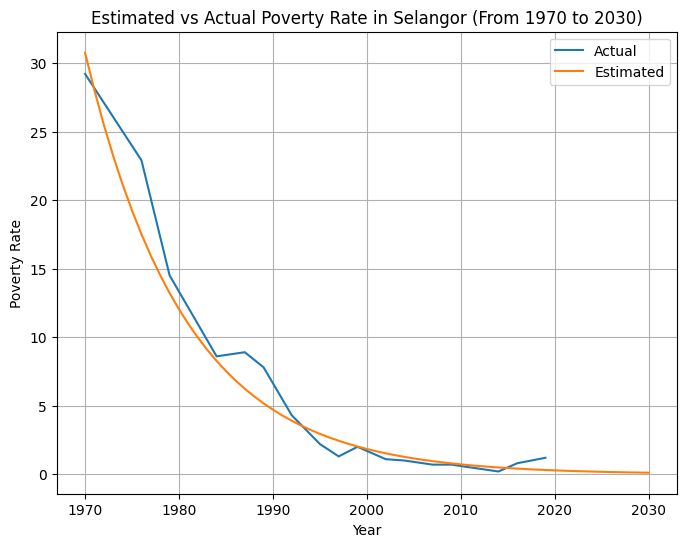

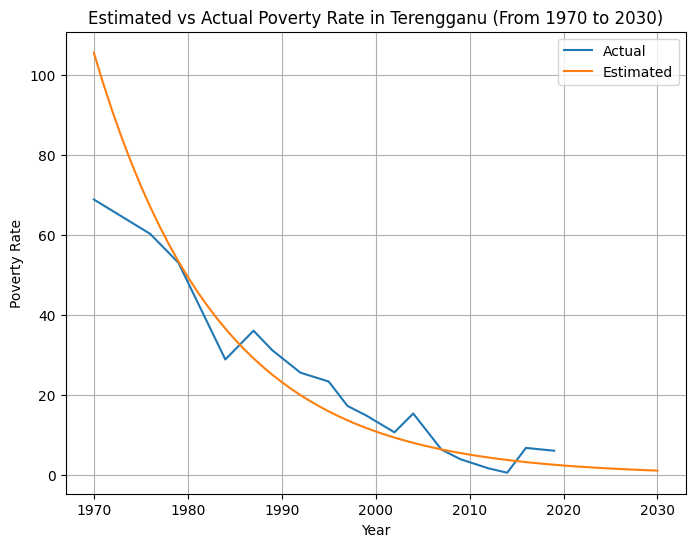

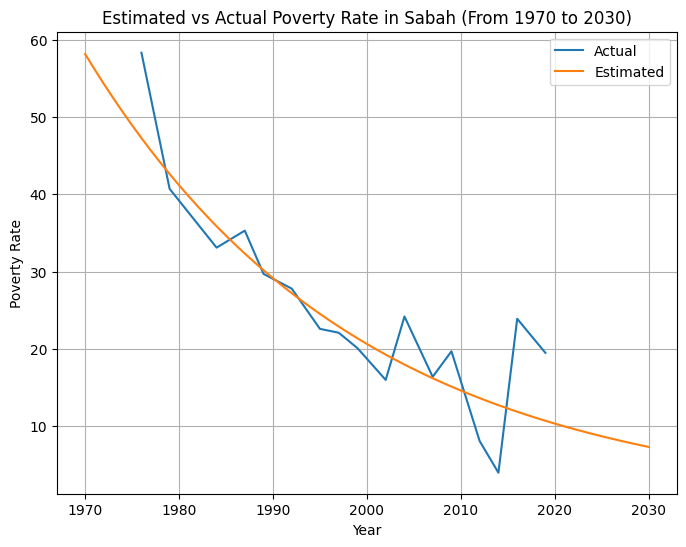

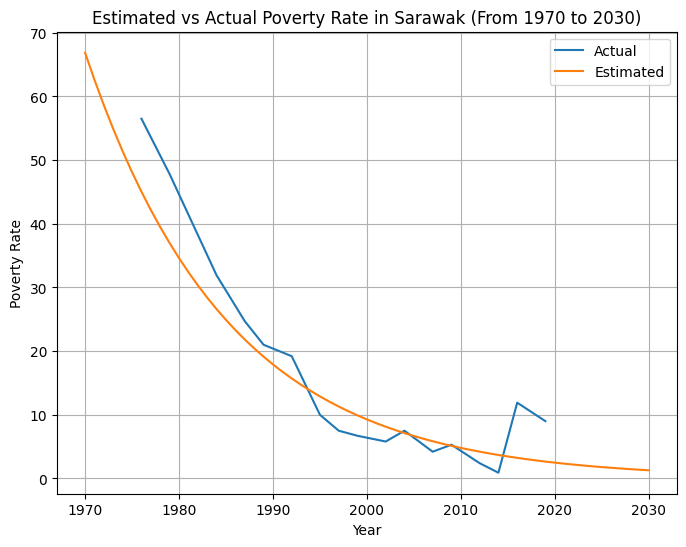

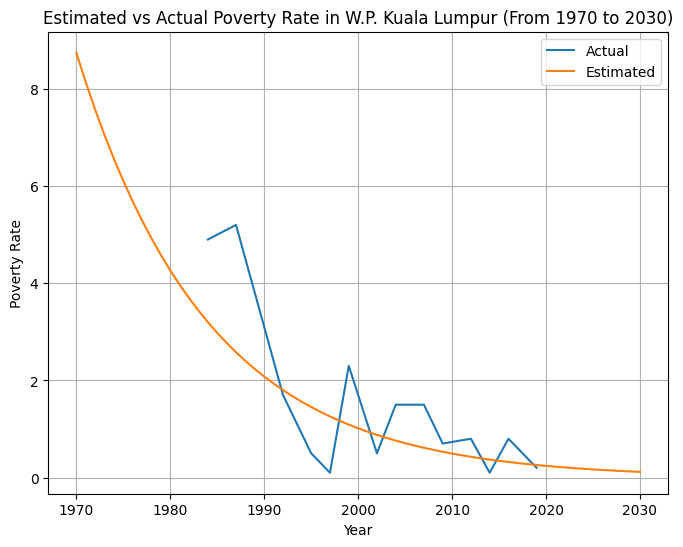

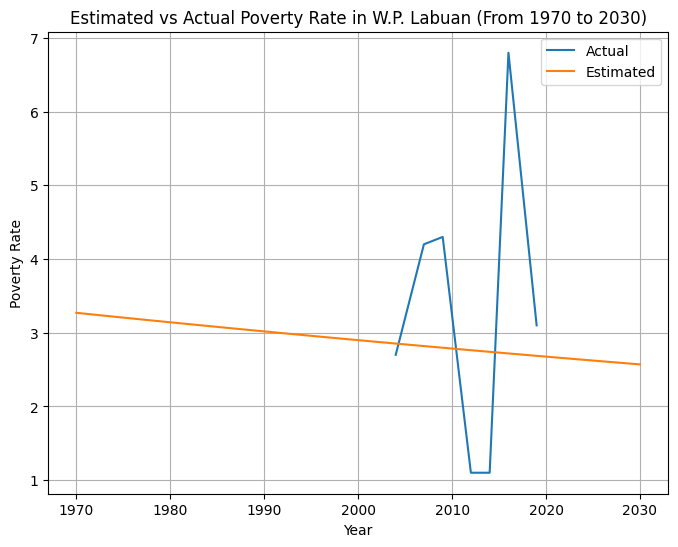

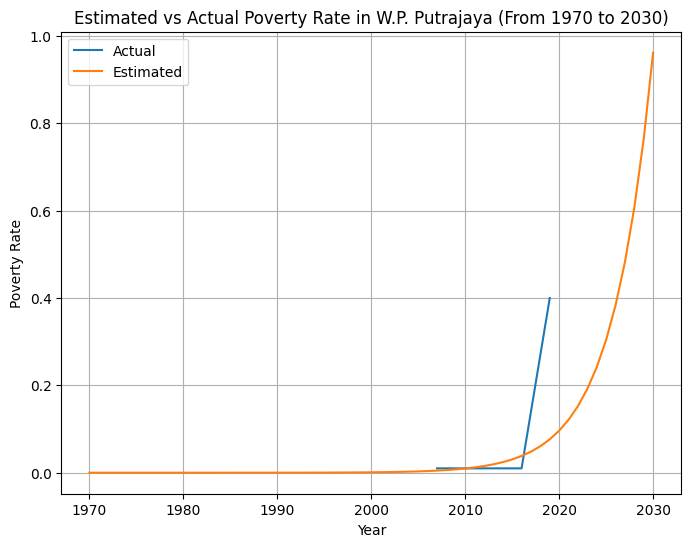

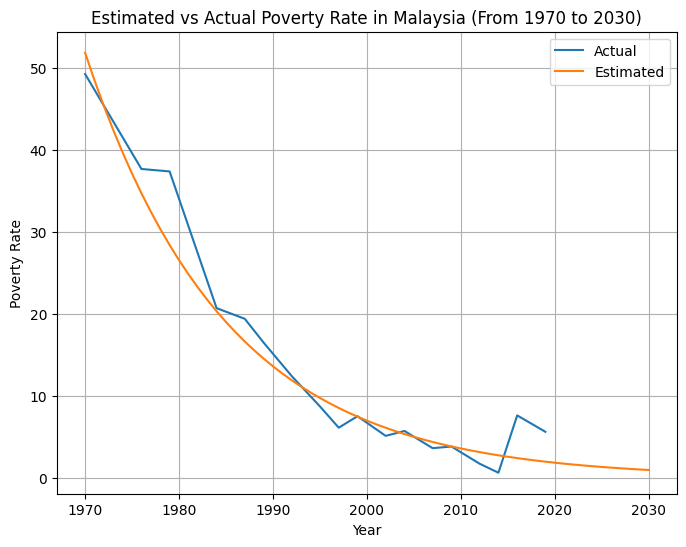

In [26]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Iterate over each state column
for state in data.columns[1:]:  # Exclude the 'Year' column
    
    # Find the first non-null index for each column
    first_non_null_index = data[state].first_valid_index()
    
    if first_non_null_index is not None:
        X = data.loc[first_non_null_index:, 'Year'].values.reshape(-1, 1)
        y = data.loc[first_non_null_index:, state]
        
        y_log = np.log(y)
        model = LinearRegression()
        model.fit(X, y_log)
        
        years_future = list(range(int(data['Year'].min()), 2031))
        X_future = np.array(years_future).reshape(-1, 1)
        predicted_log = model.predict(X_future)
        predicted = np.exp(predicted_log)

        plt.figure(figsize=(8, 6))
        plt.plot(data['Year'], data[state], label='Actual')
        plt.plot(years_future, predicted, label='Estimated')
        plt.title(f'Estimated vs Actual Poverty Rate in {state} (From {int(data["Year"].min())} to 2030)')
        plt.xlabel('Year')
        plt.ylabel('Poverty Rate')
        plt.legend()
        plt.grid(True)
        plt.show()


